## Importing required libraries

In [131]:
import os
import numpy as np
from keras.preprocessing.image import load_img,img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Getting data for training the model in the specific format

In [132]:
x=[] #list stores all the images as array
y=[] #list stores categories of different images
src='/kaggle/input/state-farm-distracted-driver-detection/imgs/train'
for classname in os.listdir(src):
    for img in os.listdir(os.path.join(src,classname)):
        img_path=os.path.join(src,classname,img)
        image=load_img(img_path,target_size=(64,64)) #loading the images from specified image path with the 64x64
        img_arr=img_to_array(image) #converting the image into a 3-D array
        x.append(img_arr)
        y.append(classname)

## Using pretrained VGG16 model to extract features of the images

In [133]:
vgg=VGG16(include_top=False) #loading VGG16 model and removing all the layers after convolutional and max pooling Layer
x=np.array(x)
x=preprocess_input(x) #preprocessing the input data required by VGG16 model which is used to extract features of an image
x=vgg.predict(x) #using pretrained VGG16 model to extract features of different images
x.shape

(22424, 2, 2, 512)

# Encoding the classes into one-hot  using to_categorical function of keras

In [134]:
le=LabelEncoder()
y=le.fit_transform(y)
y=to_categorical(y)
y.shape

(22424, 10)

## Building the model

In [148]:
model=Sequential()
model.add(Flatten(input_shape=(x.shape[1:])))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [149]:
model.summary() #printing structure of the model

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               1024500   
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5010      
Total params: 1,029,510
Trainable params: 1,029,510
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0) #splitting the data into train and test

In [150]:
#printing shape of train and test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16818, 2, 2, 512)
(5606, 2, 2, 512)
(16818, 10)
(5606, 10)


In [151]:
#training the model
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=40)

Epoch 1/40
526/526 [==============================] - 2s 3ms/step - loss: 2.5296 - accuracy: 0.5976 - val_loss: 0.4153 - val_accuracy: 0.8739
Epoch 2/40
526/526 [==============================] - 2s 3ms/step - loss: 0.6976 - accuracy: 0.7790 - val_loss: 0.2866 - val_accuracy: 0.9135
Epoch 3/40
526/526 [==============================] - 2s 3ms/step - loss: 0.5287 - accuracy: 0.8285 - val_loss: 0.1961 - val_accuracy: 0.9422
Epoch 4/40
526/526 [==============================] - 2s 3ms/step - loss: 0.4626 - accuracy: 0.8543 - val_loss: 0.1834 - val_accuracy: 0.9458
Epoch 5/40
526/526 [==============================] - 2s 4ms/step - loss: 0.4180 - accuracy: 0.8679 - val_loss: 0.1567 - val_accuracy: 0.9545
Epoch 6/40
526/526 [==============================] - 2s 3ms/step - loss: 0.3814 - accuracy: 0.8840 - val_loss: 0.1502 - val_accuracy: 0.9547
Epoch 7/40
526/526 [==============================] - 2s 3ms/step - loss: 0.3838 - accuracy: 0.8847 - val_loss: 0.1144 - val_accuracy: 0.9631
Epoch 

## Evaluating the model performance

In [153]:
#getting and printing train and test accuracy
testing_score=model.evaluate(x_test,y_test,verbose=0)[1]
training_score=model.evaluate(x_train,y_train,verbose=0)[1]
print('Testing_score:',testing_score)
print('Training_score:',training_score)

Testing_score: 0.9826971292495728
Training_score: 0.9964324235916138


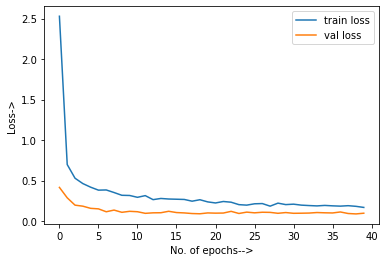

In [158]:
#plotting graph of training loss and validation loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('No. of epochs-->')
plt.ylabel('Loss->')
plt.show()

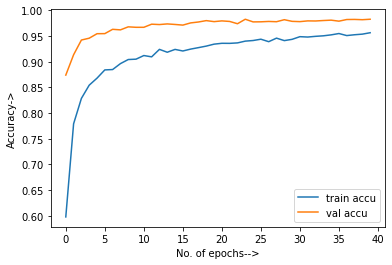

In [159]:
#plotting graph of training accuraycy and validation accuracy
plt.plot(history.history['accuracy'],label='train accu')
plt.plot(history.history['val_accuracy'],label='val accu')
plt.legend()
plt.xlabel('No. of epochs-->')
plt.ylabel('Accuracy->')
plt.show()

In [160]:
#predicting classes using trained model
y_pred=model.predict(x_test)
y_predicted=[]
y_true=[]
for y in y_pred:
    y_predicted.append(np.argmax(y))
for y in y_test:
    y_true.append(np.argmax(y))     
y_predicted=le.inverse_transform(y_predicted)  
y_true=le.inverse_transform(y_true)

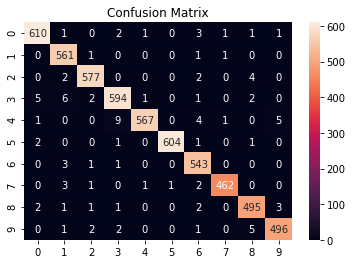

In [161]:
#printing confusion matrix
cm=confusion_matrix(y_true,y_predicted)
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [162]:
#printing the classification report
print('Classification Report:')
print(classification_report(y_true,y_predicted))

Classification Report:
              precision    recall  f1-score   support

          c0       0.98      0.98      0.98       620
          c1       0.97      0.99      0.98       564
          c2       0.99      0.99      0.99       585
          c3       0.97      0.97      0.97       611
          c4       0.99      0.97      0.98       587
          c5       1.00      0.99      1.00       609
          c6       0.97      0.99      0.98       548
          c7       0.99      0.98      0.99       470
          c8       0.97      0.98      0.98       505
          c9       0.98      0.98      0.98       507

    accuracy                           0.98      5606
   macro avg       0.98      0.98      0.98      5606
weighted avg       0.98      0.98      0.98      5606



# Let's makes some predictions on random images

In [163]:
#dictionary which as labels as key and its meaning as value
labels={'c0': 'safe driving',

'c1': 'texting - right',

'c2': 'talking on the phone - right',

'c3': 'texting - left',

'c4': 'talking on the phone - left',

'c5': 'operating the radio',

'c6': 'drinking',

'c7': 'reaching behind',

'c8': 'hair and makeup',

'c9': 'talking to passenger'}

In [164]:
#predicting the categories of the image
def predict_label(img_path):
    image=load_img(img_path,target_size=(64,64))
    img_array=img_to_array(image).reshape(-1,64,64,3)
    vgg_output=vgg.predict(preprocess_input(img_array))
    predicted_label=labels[le.inverse_transform([model.predict(vgg_output)[0].argmax()])[0]]
    return predicted_label

In [165]:
def predict(img_path):
    plt.imshow(load_img(img_path))
    plt.show()
    print(predict_label(img_path))

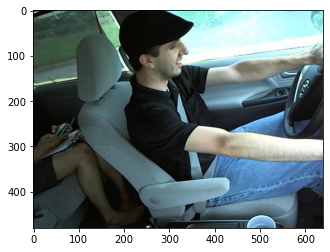

operating the radio


In [166]:
predict('/kaggle/input/testdata/test1.jpg')

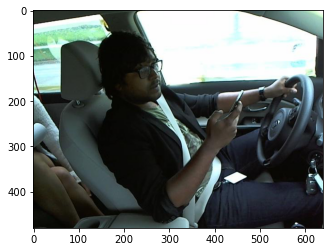

texting - right


In [167]:
predict('/kaggle/input/testdata/test2.jpg')

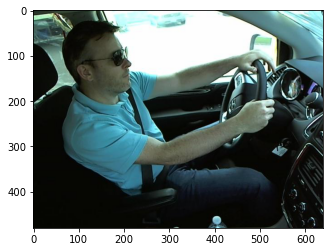

safe driving


In [168]:
predict('/kaggle/input/testdata/test3.jpg')

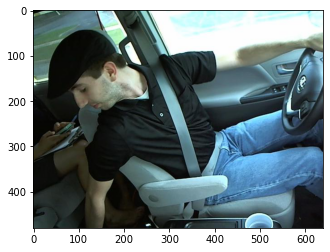

reaching behind


In [169]:
predict('/kaggle/input/testdata/test4.jpg')